In [178]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
import scipy.signal as signal
from math import log10
from scipy.signal import butter, lfilter
from scipy.stats import linregress
from statistics import mean


In [179]:
pip install biosignalsnotebooks

In [180]:
import biosignalsnotebooks as bsnb

Text(0.5, 1.0, 'Señal EMG de Abducción en el Paciente 2')

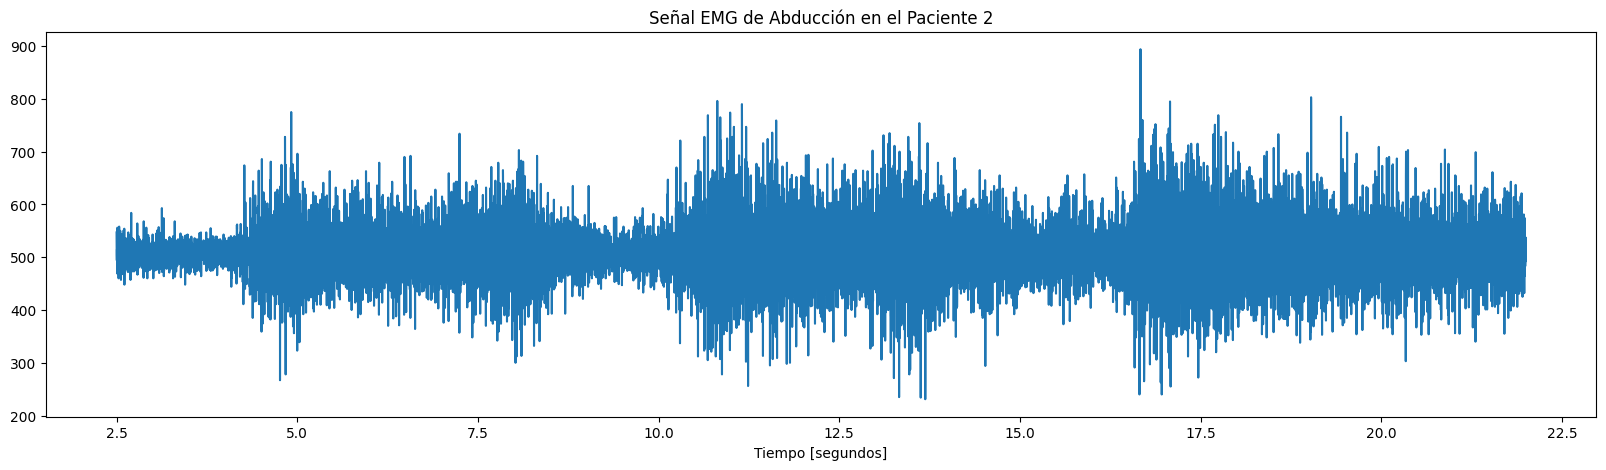

In [181]:
array1 = np.genfromtxt("p2_abduccion2.txt",   skip_header=1, delimiter="\t")
Fs = 1000
Ts = 1/Fs
señal = array1[:,-2]
señalP = señal[2500:22000]
n = len(señalP)
t = np.arange(2500,2500+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG de Abducción en el Paciente 2")



## Adapatación de la señal

[ 0.11178689 -0.00958173 -0.02235738 ... -0.03513302 -0.06387822
 -0.00319391]


Text(0.5, 1.0, 'Señal EMG de Abducción del Pulgar en el Paciente 2')

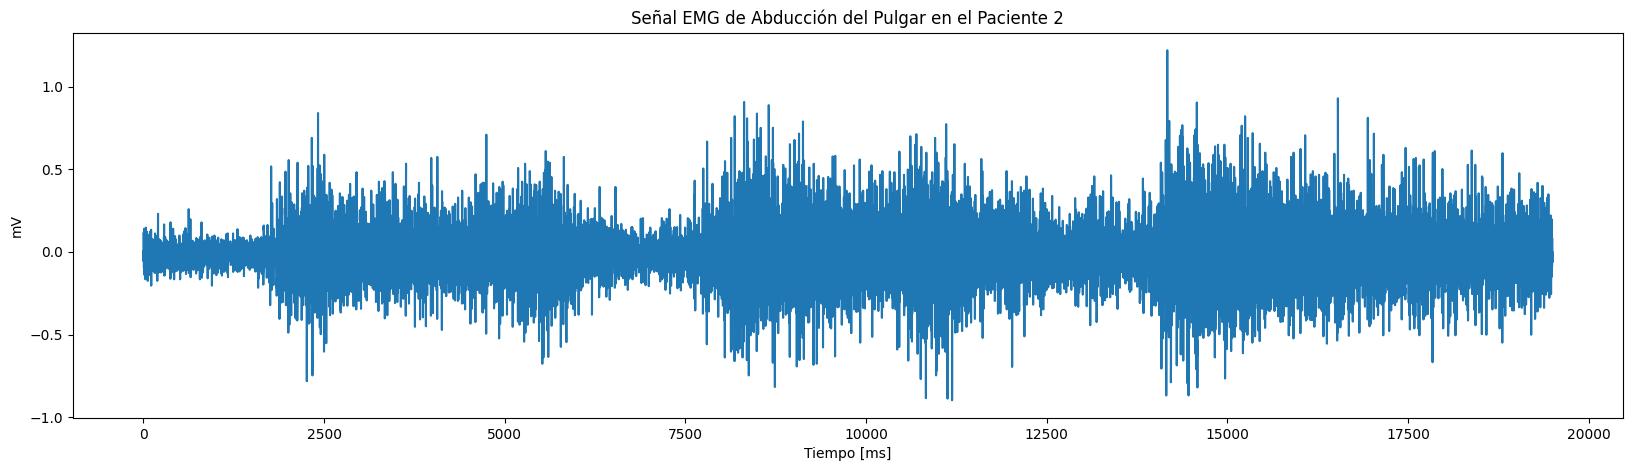

In [182]:
vcc  = 3300 #mV
gain = 1009
resolution = 10
señal = array1[:,-2]
nseñal = (((señal / 2**resolution) - 0.5) * vcc) / gain
nseñal = nseñal[2500:22000]
print(nseñal)
plt.figure(figsize=(20,5))
plt.plot(nseñal)
plt.ylabel("mV")
plt.xlabel("Tiempo [ms]")
plt.title("Señal EMG de Abducción del Pulgar en el Paciente 2")

## DETECCIÓN DE EVENTOS

Text(0.5, 1.0, 'Señal EMG de Abducción del Pulgar en el Paciente 2 - sin linea base ')

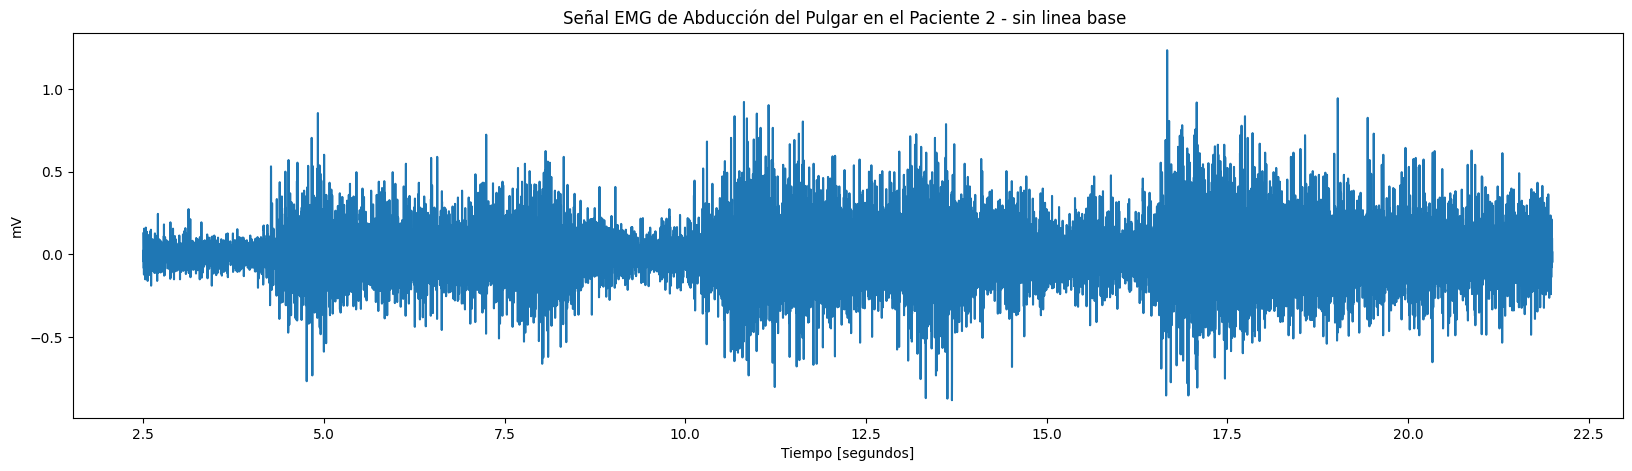

In [183]:
# Eliminacion de la linea de Base

#average = sum(señalP)/len(señalP)
#pre_pro_signal = señalP - average
pre_pro_signal2 = nseñal - np.average(nseñal)
pre_pro_signal2

señalP = pre_pro_signal2
n = len(señalP)
t = np.arange(2500,2500+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG de Abducción del Pulgar en el Paciente 2 - sin linea base ")

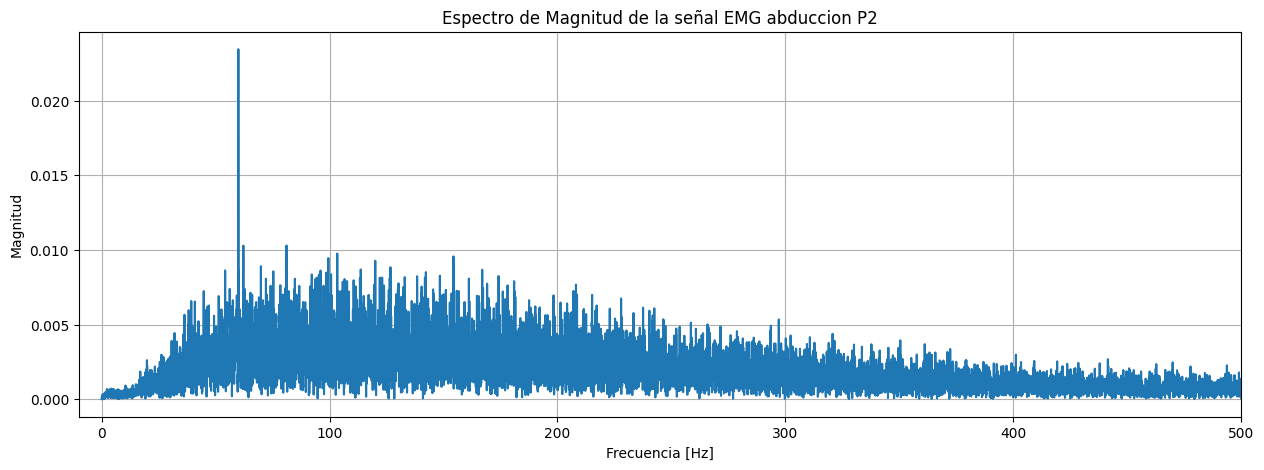

In [184]:
# Analizar el Fourier
emg_senal = pre_pro_signal2
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG abduccion P2")
plt.xlim(-10,500)
plt.show()

Text(0.5, 1.0, 'Señal de Abducción del Pulgar del Paciente 2 filtrada mediante Filtro Notch')

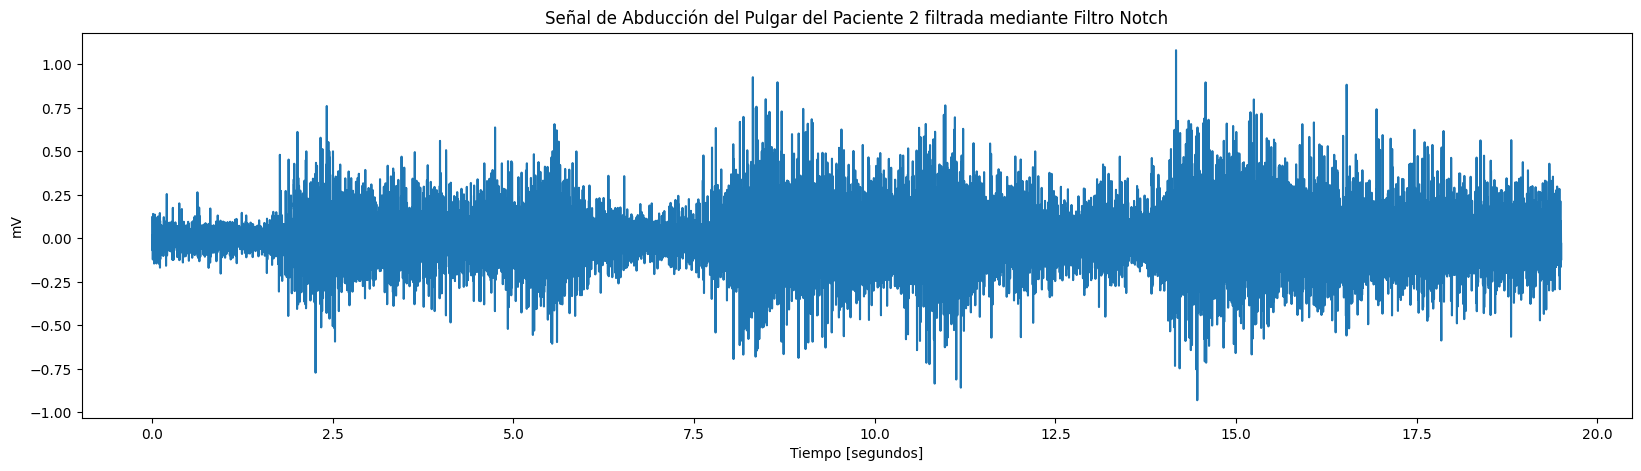

In [185]:
from scipy.signal import iirnotch, lfilter
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, emg_senal)
#y = lfilter(b, a, y)

f0 = 180.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)
#y = lfilter(b, a, y)

señalP = y
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal de Abducción del Pulgar del Paciente 2 filtrada mediante Filtro Notch")


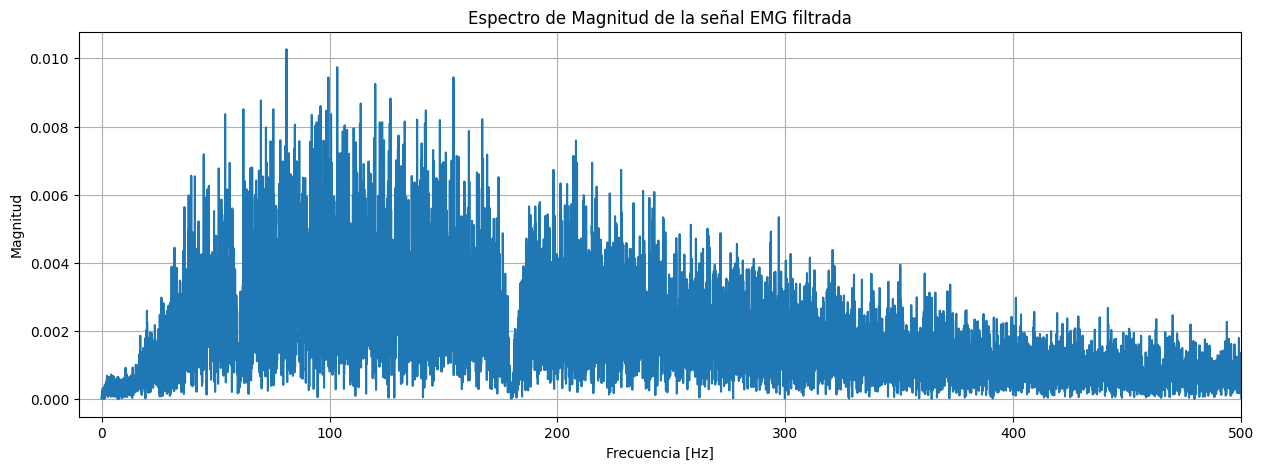

In [186]:
emg_senal = y
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

Text(0.5, 1.0, 'Señal de Abducción del Pulgar del Paciente 2 filtrada mediante Filtro Pasabanda')

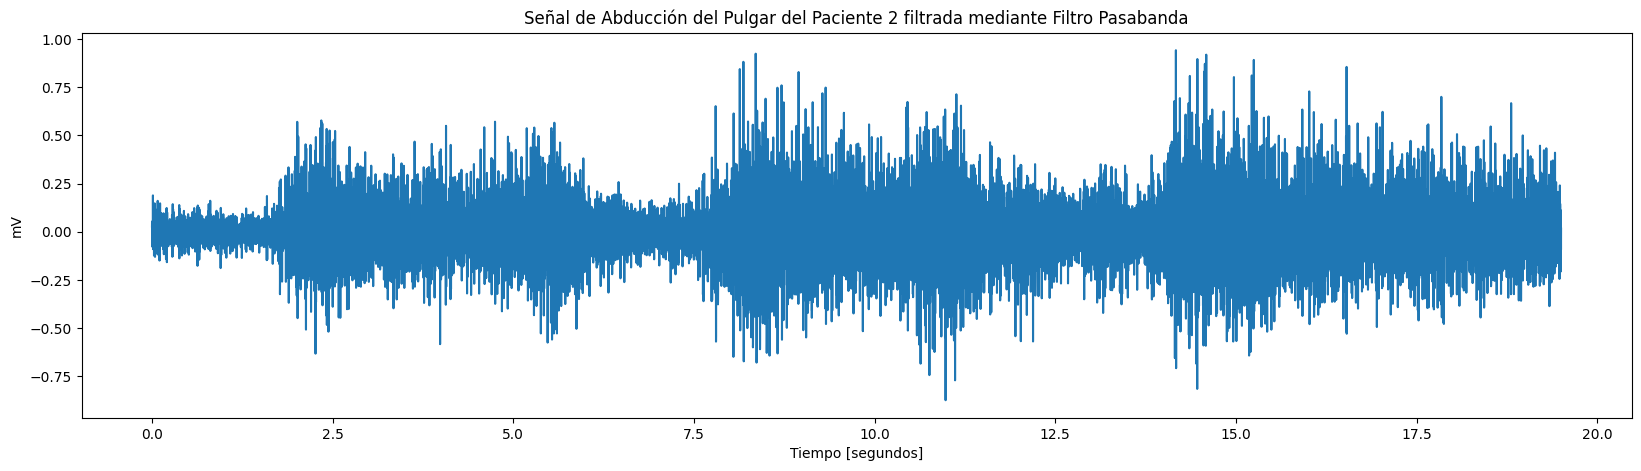

In [187]:
# Filtrado

low_cutoff = 20
high_cutoff = 400

pre_pro_signal = bsnb.aux_functions._butter_bandpass_filter(y, low_cutoff, high_cutoff, Fs)

señalP = pre_pro_signal
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal de Abducción del Pulgar del Paciente 2 filtrada mediante Filtro Pasabanda")

In [188]:
# Código empleado para generar los archivos numpy de las señales ya filtradas
señalV = señalP
data = {'señalV': señalV}
np.savez('abdu2.npz',**data)

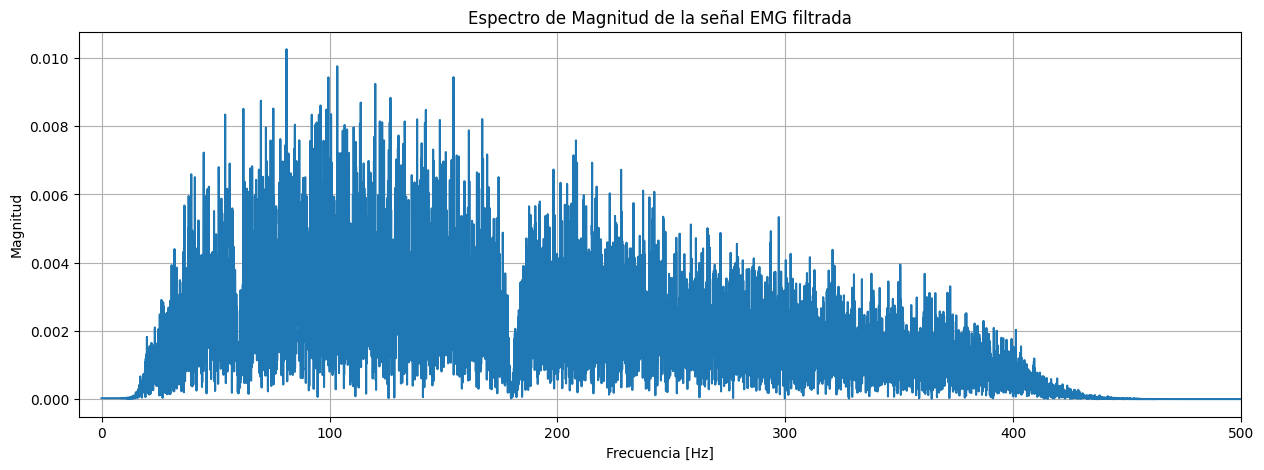

In [189]:
# Analizar el Fourier
emg_senal = pre_pro_signal
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

In [190]:
from statistics import stdev
# Umbral
avg_pre_pro_signal = mean(pre_pro_signal)
std_pre_pro_signal = stdev(pre_pro_signal)

In [191]:
# Deteccion de Activación
burst_begin, burst_end = bsnb.detect_emg_activations(señalP, Fs, smooth_level = 29, threshold_level = 19.5, time_units = True, plot_result = True)[:2]

## EXTRACCION DE CARACTERISTICAS


In [192]:
# Maximo
max_sample_value = max(señalP)
max_sample_value

0.9421134914288232

In [193]:
# Minimo
min_sample_value = min(señalP)
min_sample_value

-0.8746022019536646

In [194]:
# Promedio

avg_sample_value = np.average(señalP)
avg_sample_value


-1.5205512506932698e-05

In [195]:
# Desviacion estandar

std_sample_value = np.std(señalP)
std_sample_value

0.1673279031782925

In [196]:
time_param_dict = {"Maximum EMG": max_sample_value, "Minimum EMG": min_sample_value, "Average EMG": avg_sample_value, "Standard Deviation EMG": std_sample_value}
time_param_dict

{'Maximum EMG': 0.9421134914288232,
 'Minimum EMG': -0.8746022019536646,
 'Average EMG': -1.5205512506932698e-05,
 'Standard Deviation EMG': 0.1673279031782925}

In [197]:
# Root Mean Square
from statistics import sqrt

rms = sqrt((sum(señalP*señalP))/len(señalP))
rms


0.16732790386917426

In [198]:
time_param_dict = {"Maximum EMG": max_sample_value, "Minimum EMG": min_sample_value,
                   "Average EMG": avg_sample_value, "Standard Deviation EMG": std_sample_value}

In [199]:
# Area bajo la curva
from scipy import integrate
area = integrate.cumtrapz(señalP)
area

array([ 0.04001828,  0.05436424,  0.00350633, ..., -0.23745345,
       -0.27947432, -0.31809687])

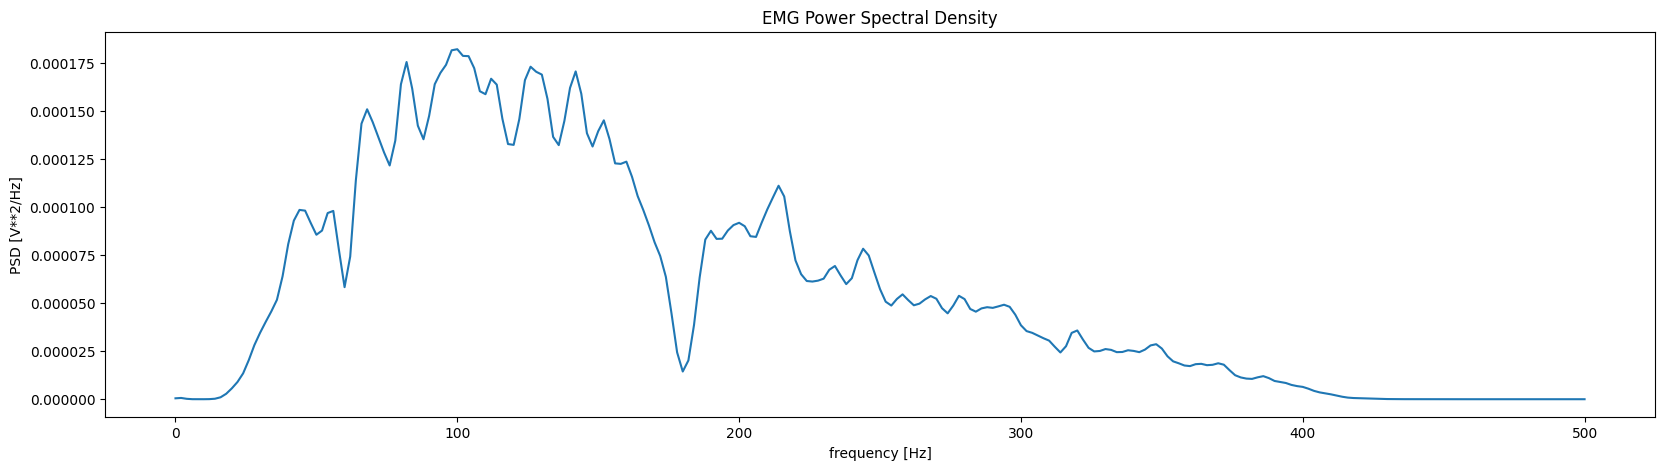

In [200]:
# Potencia espectral de la señal
from scipy import signal
f, P = signal.welch(señalP, fs = Fs, window = 'hann', noverlap = 0, nfft = int(500.))
plt.figure(figsize=(20,5))
plt.plot(f, P)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title("EMG Power Spectral Density")
plt.show()

In [201]:
# potencia total
area_freq = integrate.cumtrapz(P, f, initial = 0)
total_power = area_freq[-1]
total_power

0.028845758095572667

In [202]:
# Frecuencia Media

median_freq = f[np.where(area_freq >= total_power / 2)[0][0]]
median_freq


140.0

In [203]:
f_max = f[np.argmax(P)]
f_max

100.0